<a href="https://colab.research.google.com/github/ZBHlily/Summer22-MicroCredential/blob/main/Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem 

In this iris dataset, we will predict the species of the flowers based on the sepal length, sepal width, petal length, and petal width

# Task 2: Load the Libraries

In [ ]:
# loading necessary libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Task 3: Load the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Summer22-MicroCredential-Data/main/iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Task 4: EDA ( Exploratory Data Analysis )


In [ ]:
df['Class'].value_counts() # return unqiue values in each 

Setosa        50
Versicolor    50
Virginica     50
Name: Class, dtype: int64

In [ ]:
df.describe() # output shows we need to scale since the values dont fall in similar ranges

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum() # checking for any null values 

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

In [ ]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

# Task 5: Data Visualization

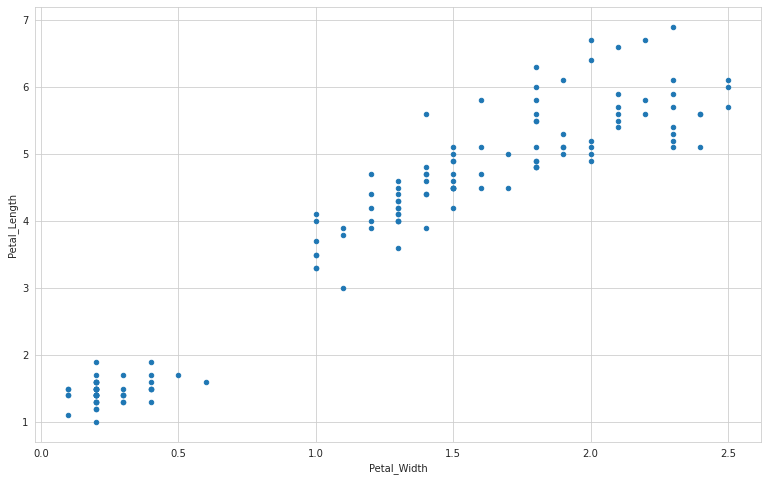

In [ ]:
df.plot(kind='scatter', x='Petal_Width', y='Petal_Length', figsize=(13,8)); # graphing petal width vs petal length 
# the data points to each other so same characterisitics to the right shows a linear relationship
# there are vertical lines = stacked so there must be a rounding error 
# the bigger the width the bigger the length of the petal

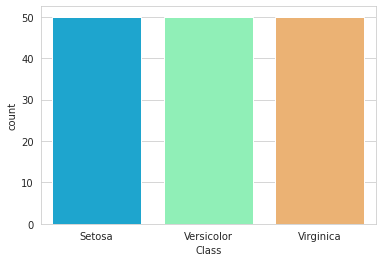

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = "Class", data = df, palette = "rainbow") # using bar graph to plot how many iris flowers there are for each 
# all the the diff sizes for each but they pertain to the same amount of flowers analyzed for each

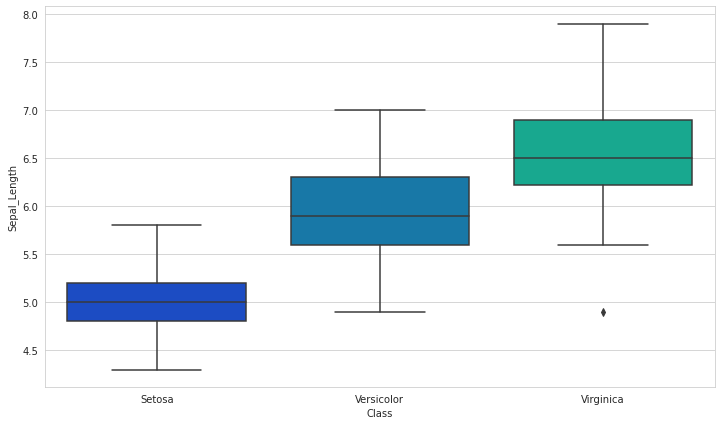

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Class', y = 'Sepal_Length', data = df, palette = 'winter') # scatter plot to show how our data is scattered over the the plane
# we can see the mean, median and deviation for each of the flowers
# from the smallest flower to biggest --> Setosa, versicolor, Virginica

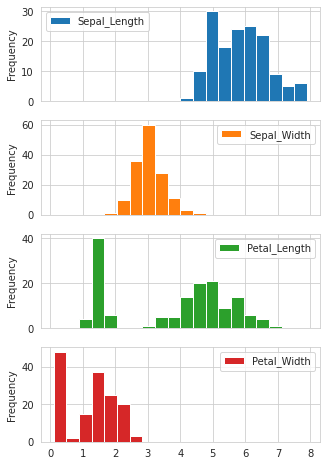

In [ ]:
df.plot(bins=20, kind='hist', subplots=True, figsize=(5,8)); # uses subplots to see frequence of each feature

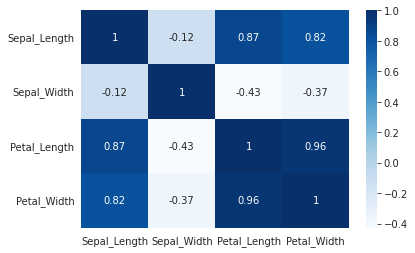

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')  
# heatmap used to show where the strongest correlation are for each such as petal_width vs petal length

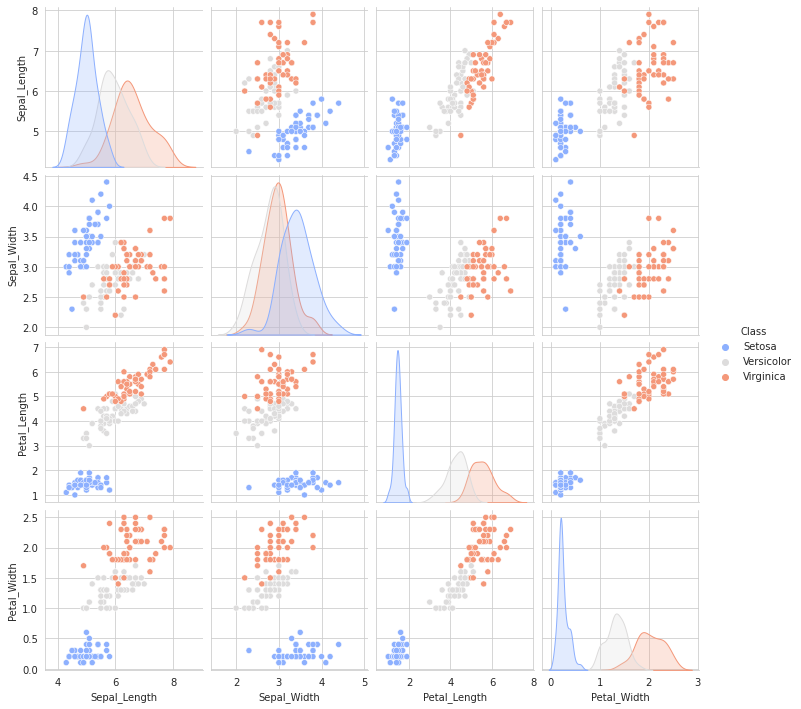

In [ ]:
sns.pairplot(df, hue='Class', palette='coolwarm') # catch all plots to see the where the correlations reside

# Task 6: Compute the cost Function

In [ ]:
# At this time, no cost function needed

# Task 7: Compute the Gradient Descent

In [ ]:
# At this time, no gradient descent needed

# Task 8: Visualizing the Cost Function

In [ ]:
# At this time, no cost function needed

# Task 9b: Conduct KNN on the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Let's obtain columns from our data set to create labeled examples
X = df.iloc[:, [0,1,2,3]].values # features
y = df.iloc[:, 4].values # label

# First KNN model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) # split them into a training set 

In [ ]:
# scaling it first for better accurancy
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
# plotting possible valules for k
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

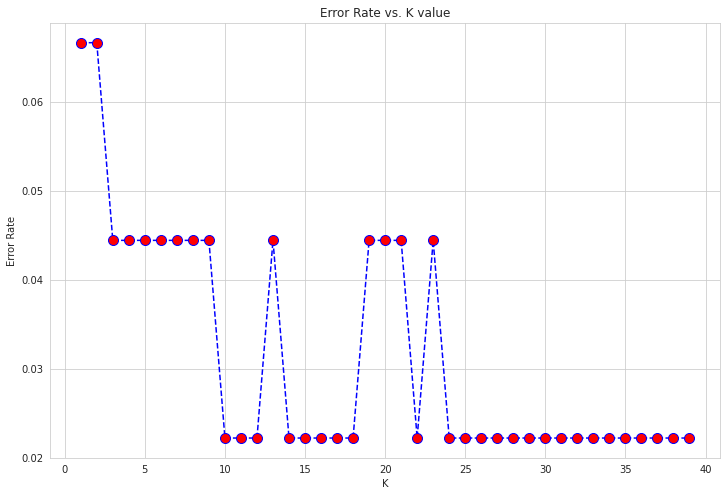

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(1,40), error_rate, color= 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# red dot = num of clusters
# blue line = indicating the error 
# to choose n is we look for where there is no error and then the lowest error going down 
# k is 1 or 2 when there is no error then the error has no error when k is 3

knn = KNeighborsClassifier(n_neighbors=3) # Create the KNeighborsClassifier model with the umber of neighbors to be 3 
knn.fit(scaled_x_train, y_train) # Fit the model to the scaled training data below

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [ ]:
print("K is 3")
print(confusion_matrix(y_test, pred))

K is 3 
[[16  1  0]
 [ 0 13  1]
 [ 0  1 13]]


In [ ]:
print(classification_report(y_test, pred))
# accurancy is 0.93 which is indicates that the model may be overfitting 

              precision    recall  f1-score   support

      Setosa       1.00      0.94      0.97        17
  Versicolor       0.87      0.93      0.90        14
   Virginica       0.93      0.93      0.93        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
# testing out other k values 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train)
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [ ]:
print("K is 5")
print(confusion_matrix(y_test, pred))

K is 5
[[17  0  0]
 [ 0 12  2]
 [ 0  1 13]]


In [ ]:
print(classification_report(y_test, pred))
# accurancy seems to be the same as n = 3

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       0.92      0.86      0.89        14
   Virginica       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Second KNN Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10) # split them into a training set 

In [ ]:
scaler = StandardScaler() # scaling it first for better accurancy
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
error_rate = [] # plotting possible valules for n 

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

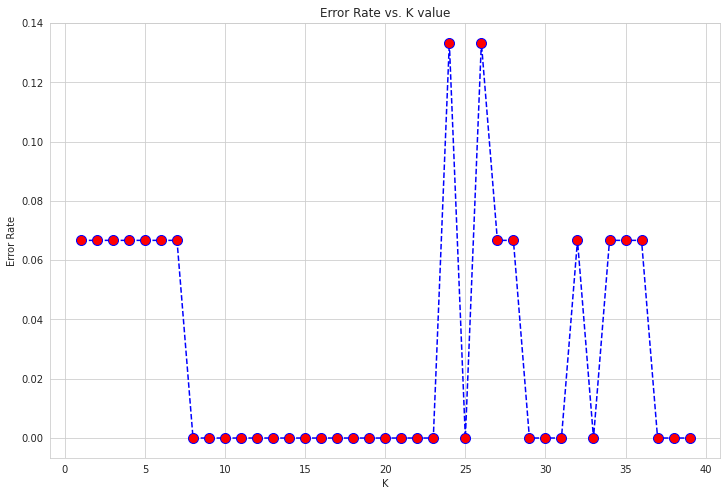

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(1,40), error_rate, color= 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# red dot = num of clusters
# blue line = indicating the error 
# to choose n is we look for where there is no error and then the lowest error going down 
# k is 1 throught 6 when there is no error then the error has no error when k is 7

knn = KNeighborsClassifier(n_neighbors=7) # Create the KNeighborsClassifier model with the number of neighbors to be 7
knn.fit(scaled_x_train, y_train) # Fit the model to the scaled training data below

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [ ]:
print("K is 7")
print(confusion_matrix(y_test, pred))

K is 7
[[4 0 0]
 [0 6 0]
 [0 0 5]]


In [ ]:
print(classification_report(y_test, pred))
# accurancy is 1.00 which is 100% overfitting

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         4
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
# testing out other k values 
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred

In [ ]:
print("K is 25")
print(confusion_matrix(y_test, pred))

K is 25
[[4 0 0]
 [0 6 0]
 [0 0 5]]


In [ ]:
print(classification_report(y_test, pred))
# despite k being 7 above, k is 25 and the accuarancy is 1.00 which 100% overfitting as well for this training set 

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         4
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# Third KNN model

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # split them into a training set 

In [205]:
# scaling it first for better accurancy
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [206]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [207]:
# plotting possible valules for k
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

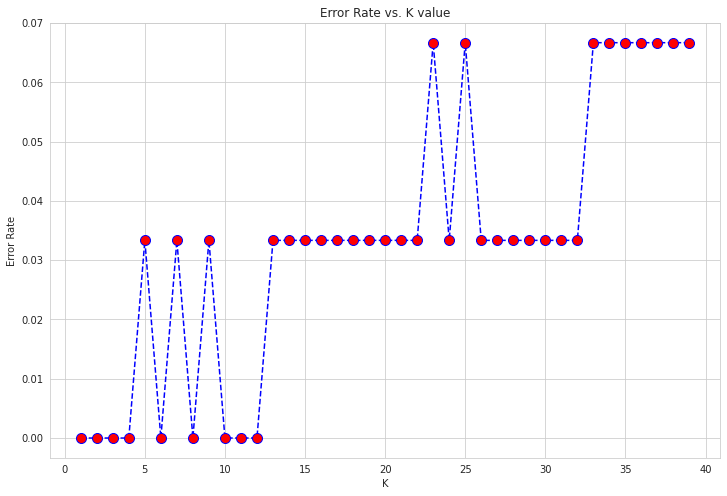

In [208]:
plt.figure(figsize = (12,8))
plt.plot(range(1,40), error_rate, color= 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [230]:
knn = KNeighborsClassifier(n_neighbors=10) # Create the KNeighborsClassifier model with the umber of neighbors to be 10
knn.fit(scaled_x_train, y_train) # Fit the model to the scaled training data below
pred = knn.predict(scaled_x_test) # Make predictions on the test data below and assign the result to the variable pred
print("K is 10")
print(classification_report(y_test, pred)) # this is overfitting 100%

K is 10
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Task 9a: Conduct the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# First Logistic Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10) # splitting the data

In [ ]:
scaler = StandardScaler() # scaling it 
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression() # Create the logistic regression model
model.fit(scaled_x_train, y_train) # fitting the model to training data 

LogisticRegression()

In [ ]:
y_pred = model.predict(scaled_x_test) #Make predictions on the test data below 
y_pred

array(['Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
print(classification_report(y_test, y_pred)) 
# the accurancy is 1.00 which shows that it is overfitting

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         5
   Virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# Second Logistic Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # splitting the data

In [ ]:
scaler = StandardScaler() # scaling it 
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train) # fitting the model

LogisticRegression()

In [ ]:
y_pred = model.predict(scaled_x_test)
y_pred

array(['Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor'],
      dtype=object)

In [ ]:
print(classification_report(y_test, y_pred))
# the accurancy is 0.97 which shows that it is overfitting

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       0.89      1.00      0.94         8
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Third Logistic Regression Model

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) # splitting the data

In [242]:
scaler = StandardScaler() # scaling it 
scaler.fit(X_train)
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [243]:
model = LogisticRegression()
model.fit(scaled_x_train, y_train) # fitting the model

LogisticRegression()

In [244]:
y_pred = model.predict(scaled_x_test)
y_pred

array(['Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor'], dtype=object)

In [245]:
print(classification_report(y_test, y_pred))
# the accurancy is 0.93 which could be overfitting

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        18
  Versicolor       0.87      0.93      0.90        14
   Virginica       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



# Task 10: Making Predictions

For Logistic Regression it seems that if we split the data 10% it has an accurancy of 1.00 and if we split it more, we the accurancy decreases to 0.97 so with logistic regression, it's better to split it 20% or more to prevent overfitting. For KNN, the data was spilt 30% and the accurancy was 0.93 for both k values and for the other the data was spilt 10%, whle the accurancy was 1.0 for both k values. 

In general, when we split the data at 10%, it shows that it is overfitting with 1.0 accurancy so a better training split is needed and for the iris set, it seems that logistic regression does better when the data is 20% split, logistic gives a 0.97 while KNN gives 1.00 accurancy which is overfitting but when the data is split 30%, both models have the same accurancy of 0.93. Thus, it comes down to how much the data is being split which may result in one model being better than the other or have the same accurancy score 